In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('raw_experiments.csv', index_col=0)


In [2]:
def get_experiment_df(exp: list[str], role = 'all'):
#     new_df = df[df['experiment'] == exp]
    new_df = df[df['experiment'].isin(exp)]
    if role == 'all':
        return new_df
    return new_df[new_df['human_role'] == role]

def remove_rename_columns(df, remove=True):
    questions_rename = {'How much did you enjoy the task?' : 'Q_enjoy',
                        "How successful do you think you were at completing the task?" : 'Q_successful'
                       }
    if remove:
        remove_cols = ['human_role', 'experiment', 'map', 'pid']
        all_cols = list(df.columns)
        remove_cols.extend(list(filter(lambda x: 'bot_' in x, all_cols)))
        df = df.drop(remove_cols, axis=1)
    
    df = df.rename(columns=questions_rename, errors="raise")
    return df


In [3]:
def plot_corr_matt(df, title):
    f = plt.figure(figsize=(15, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(f'{title} - Correlation Matrix', fontsize=16)

    
def plot_2d_scatter(df, title, x, y, color, size):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, title=title)
    fig.show()

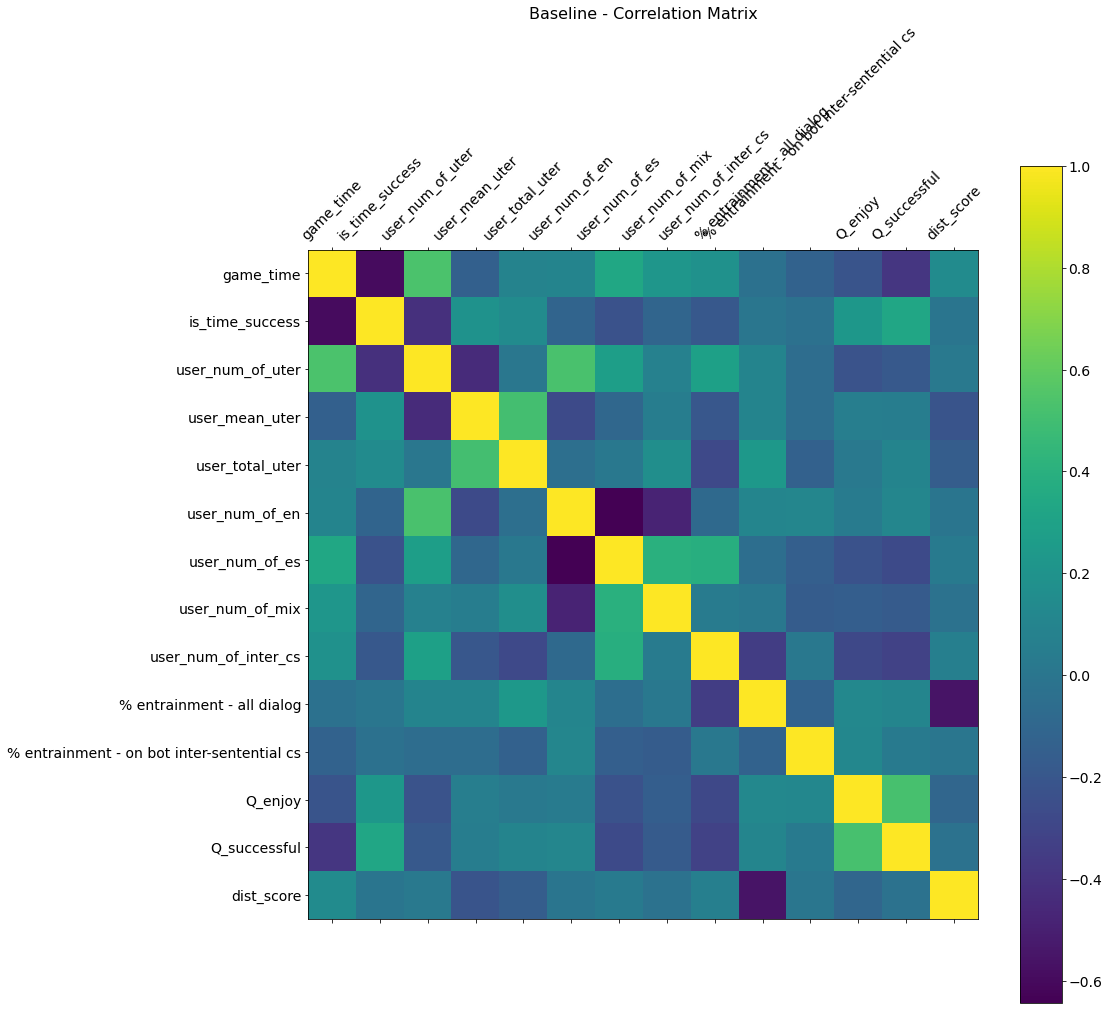

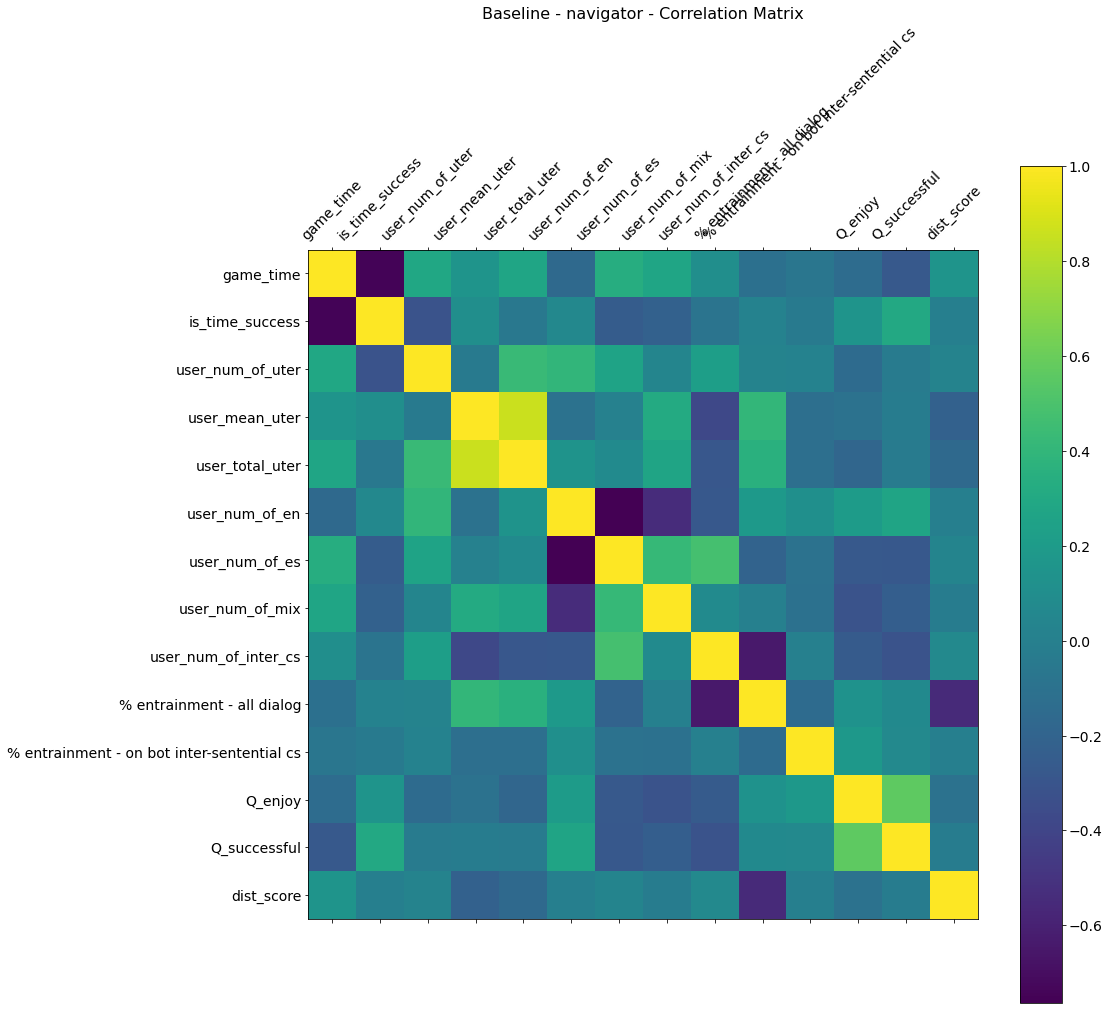

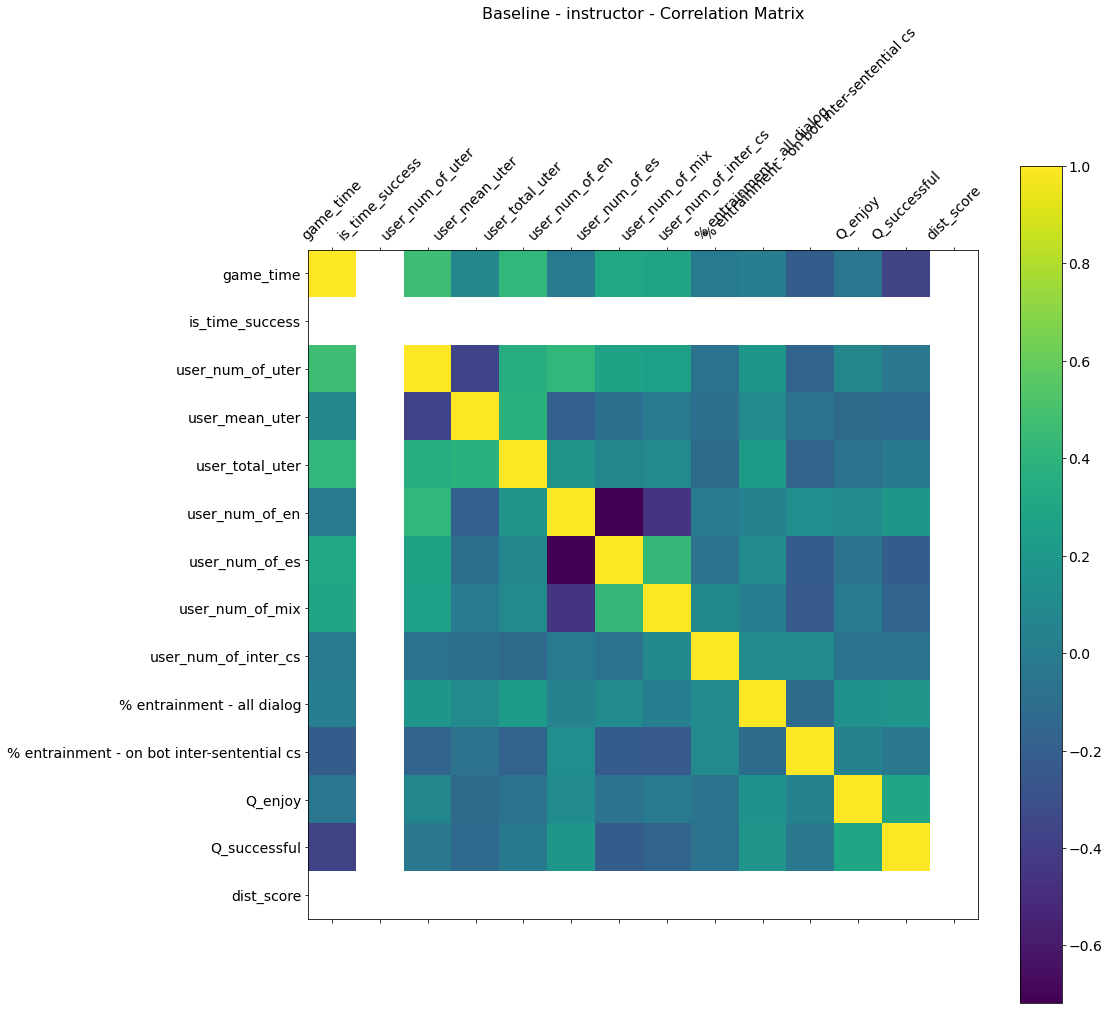

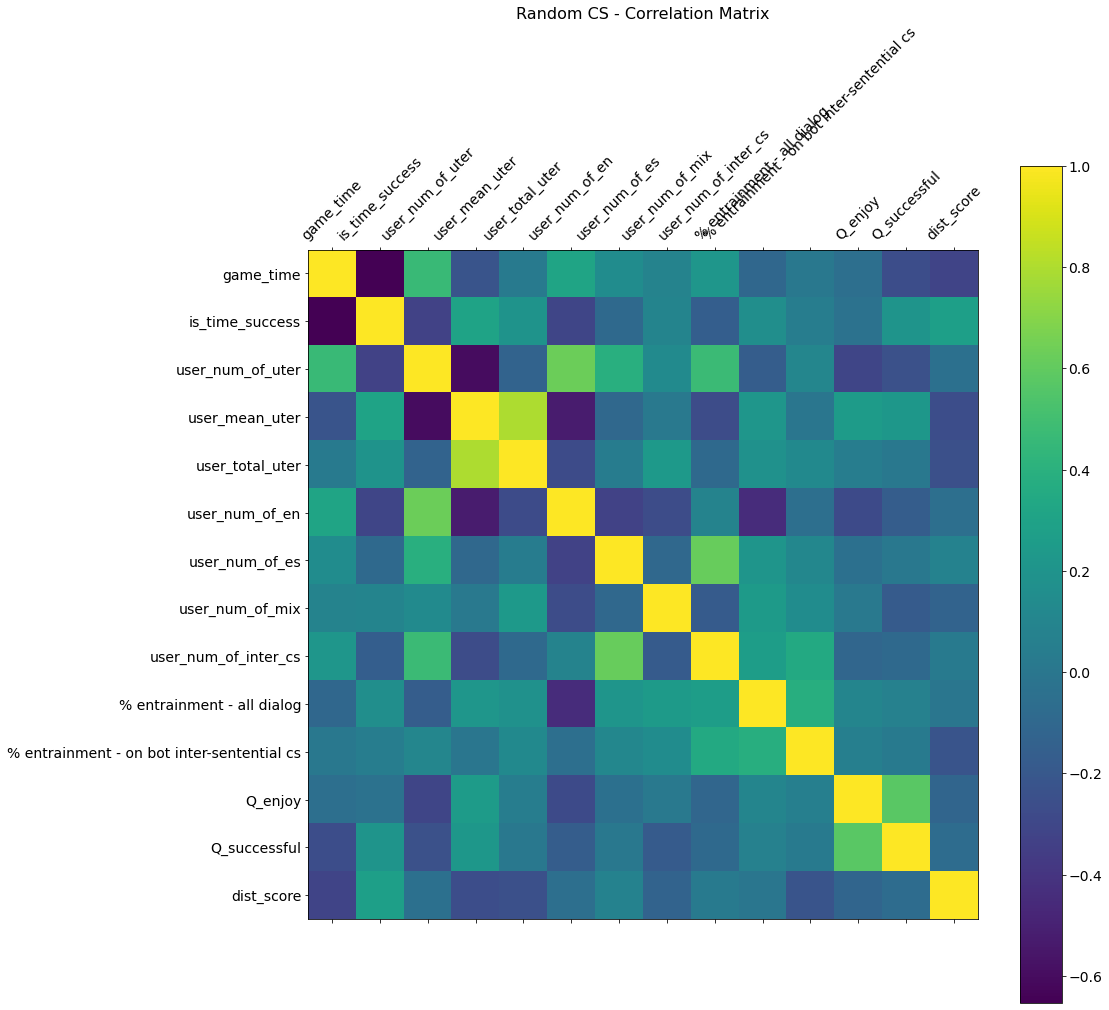

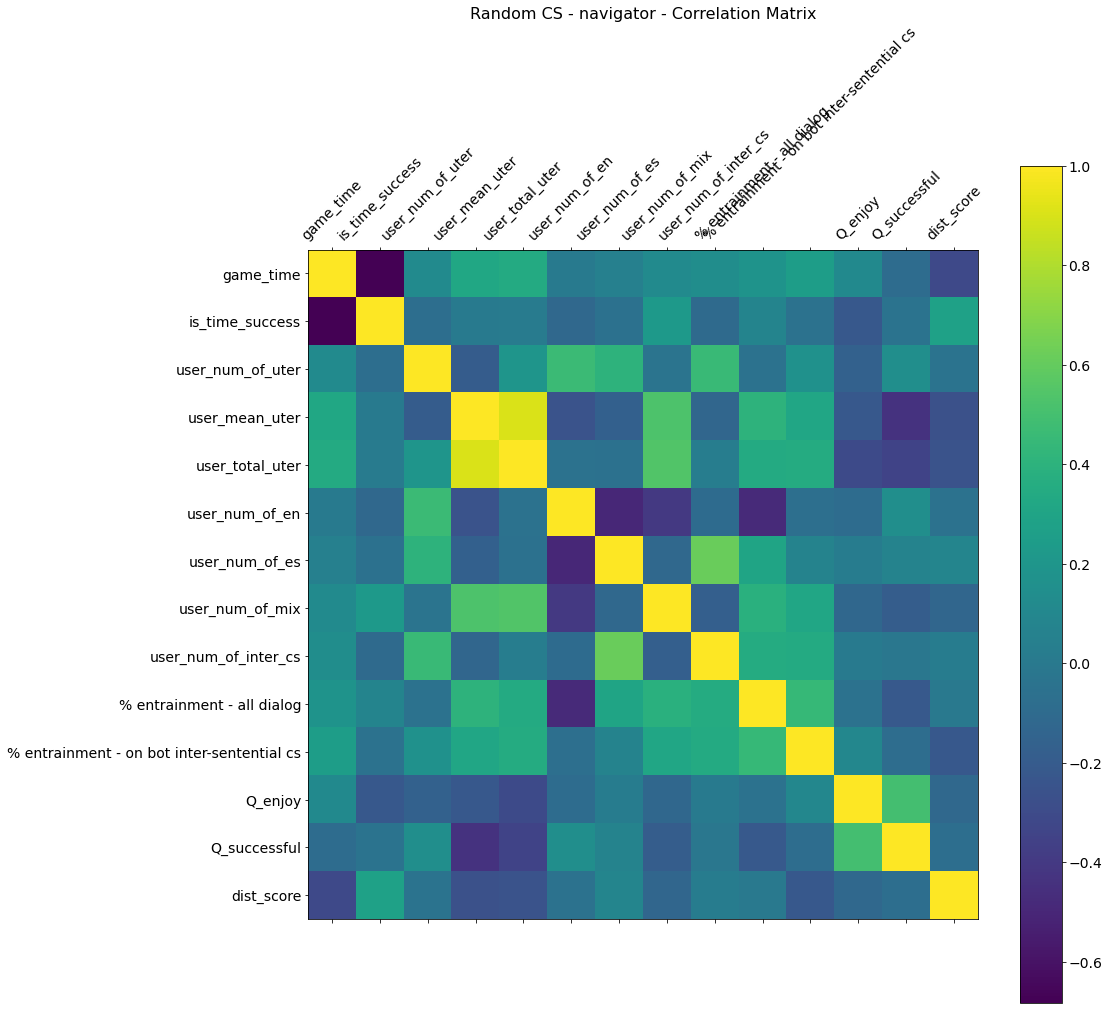

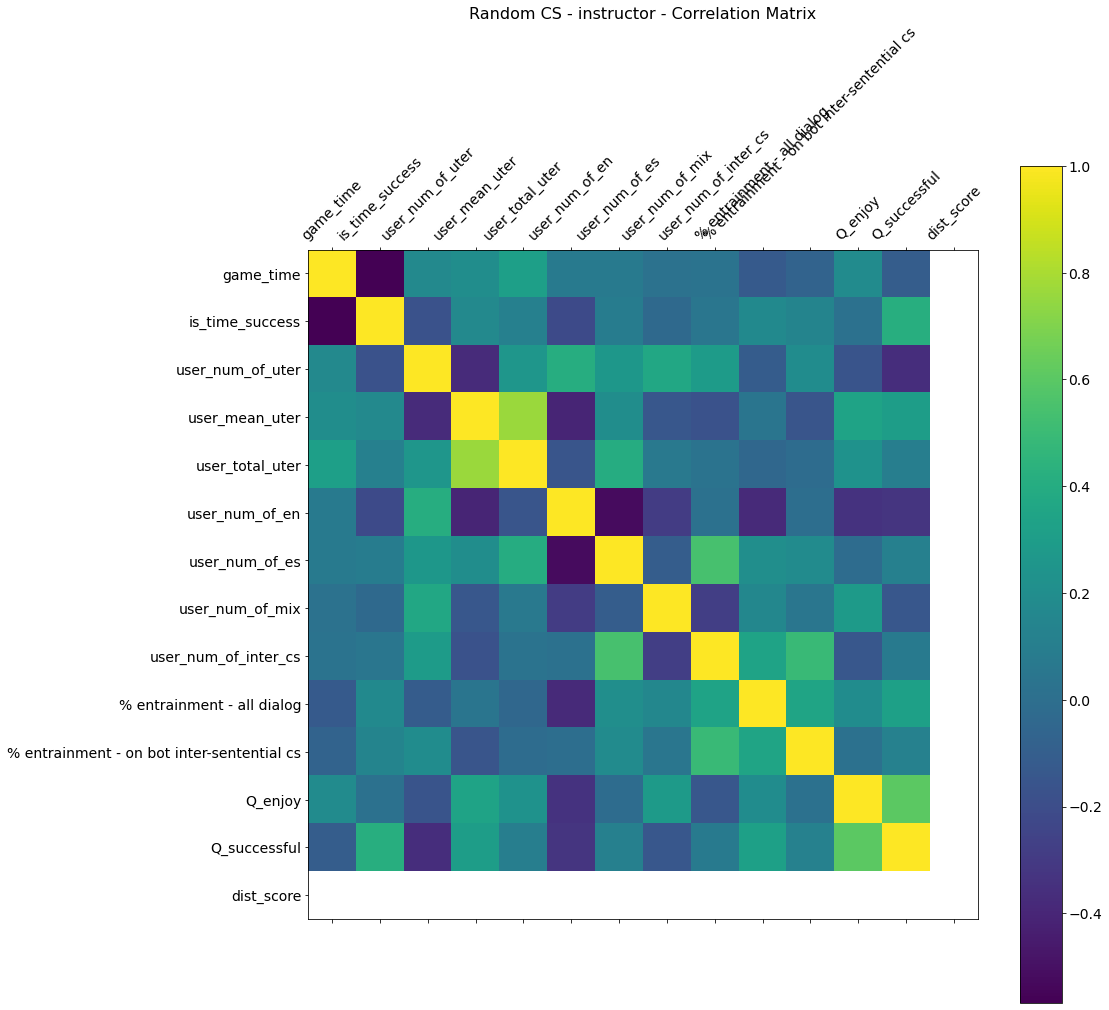

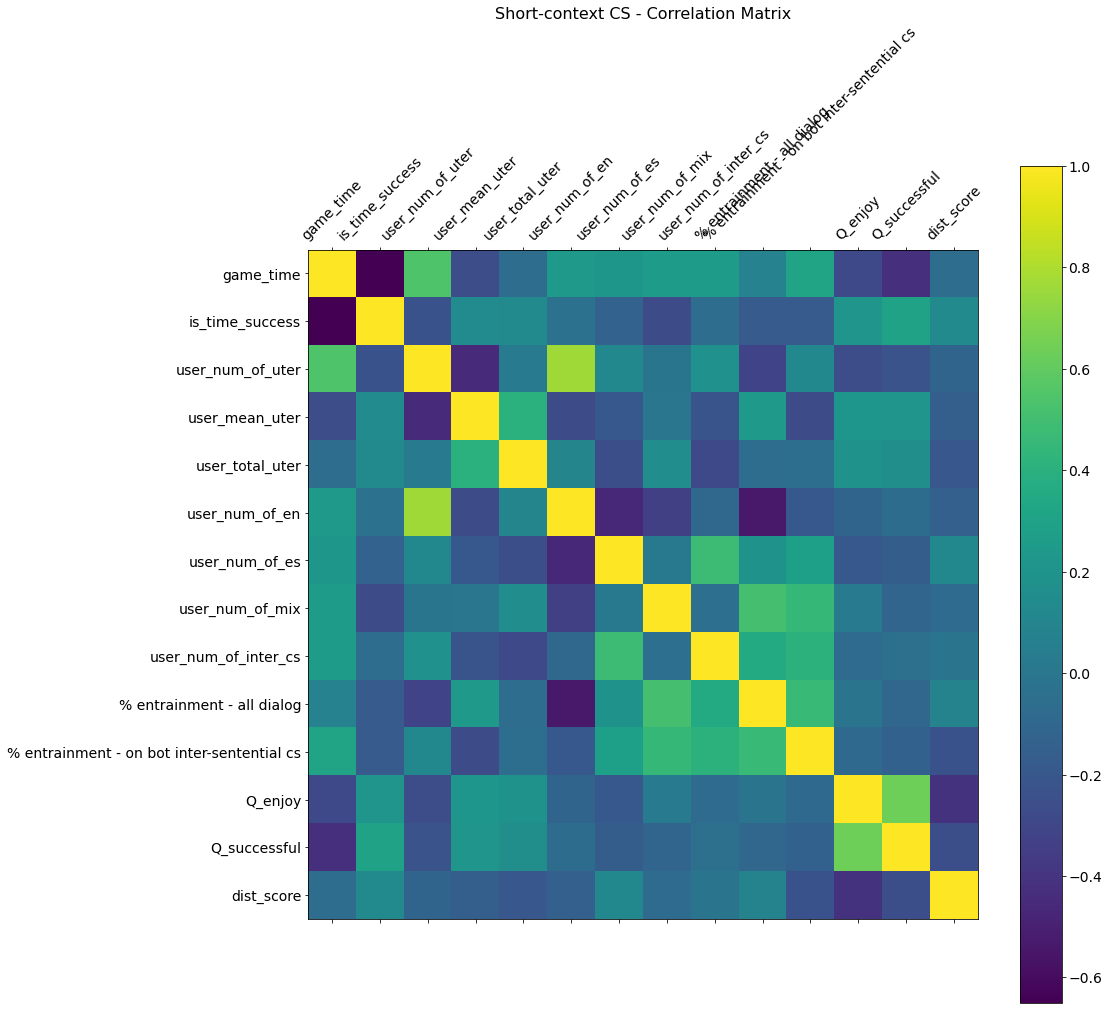

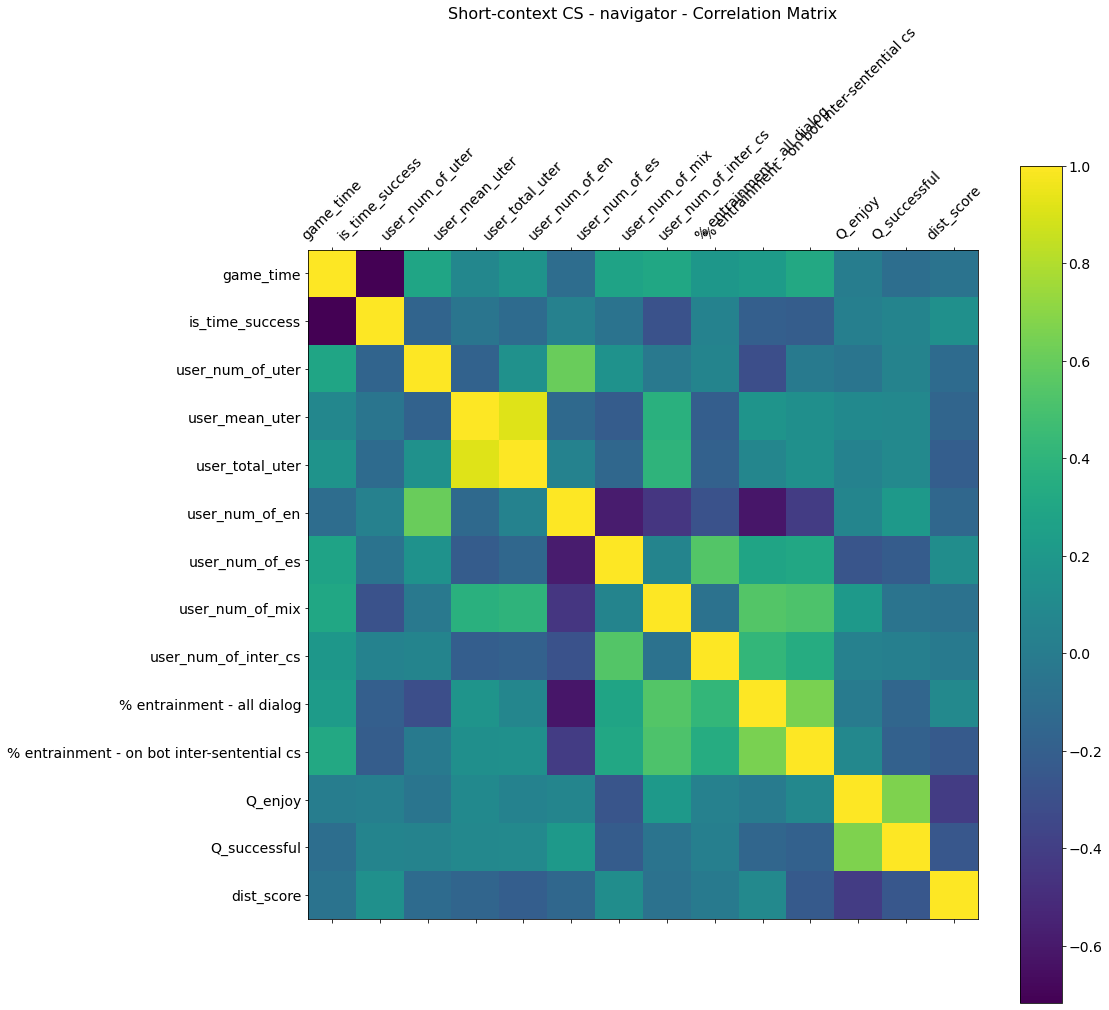

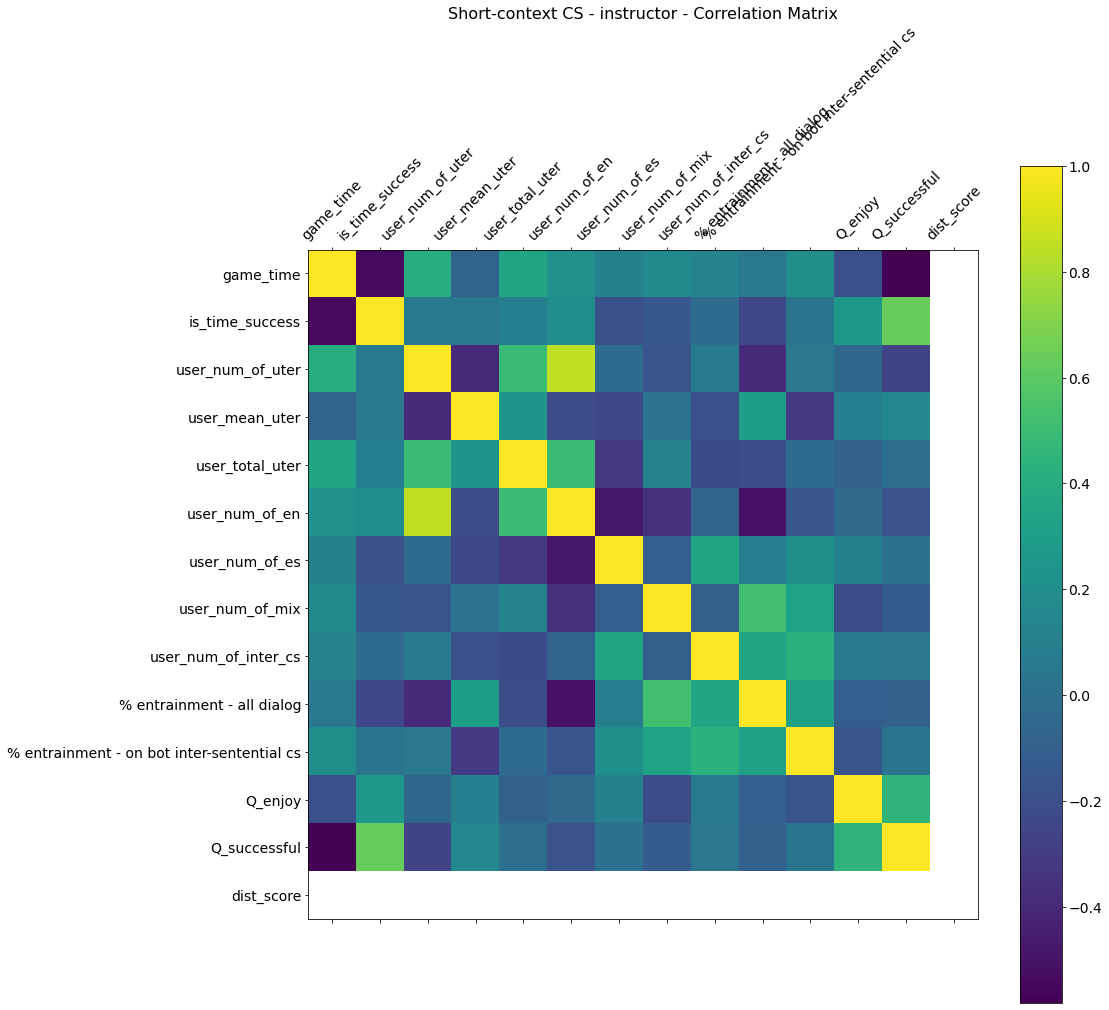

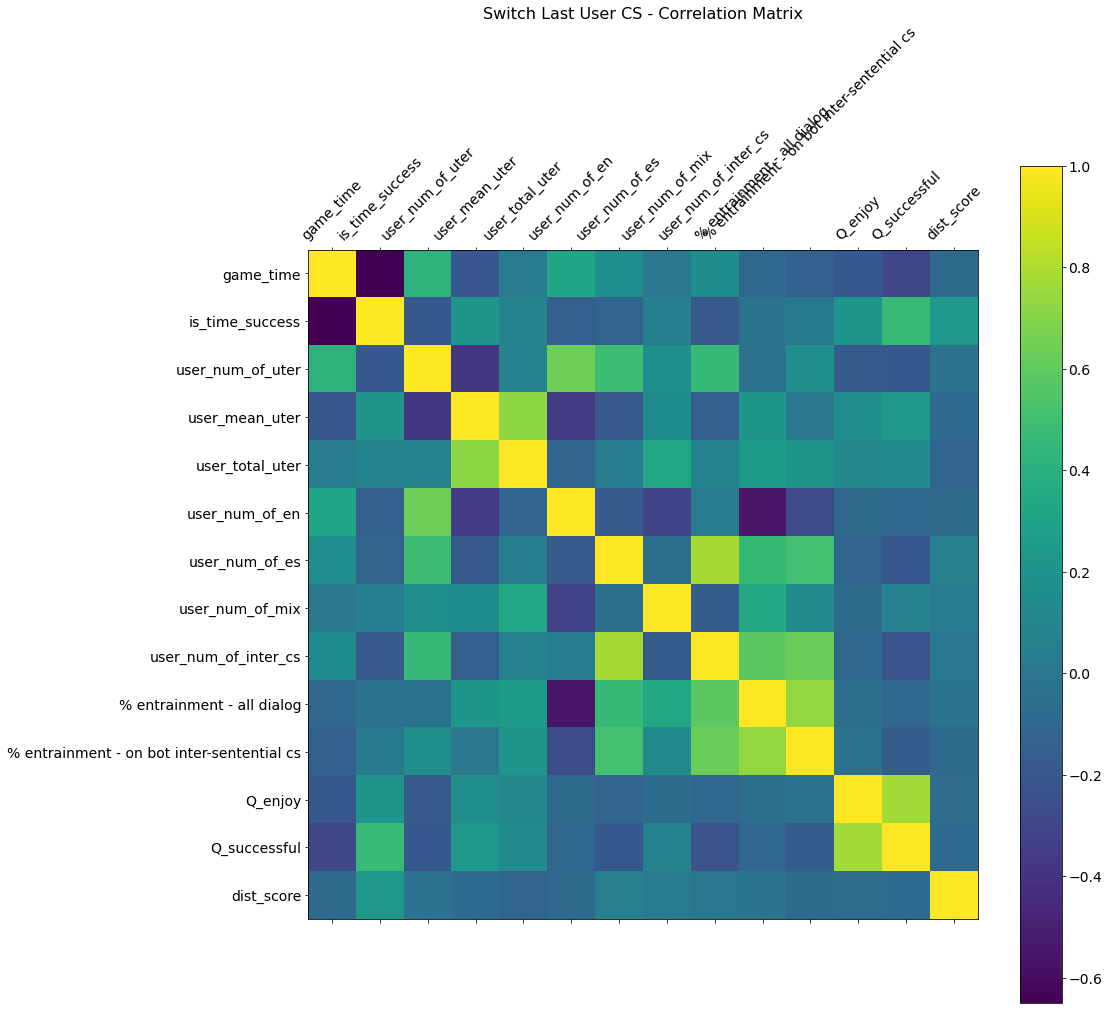

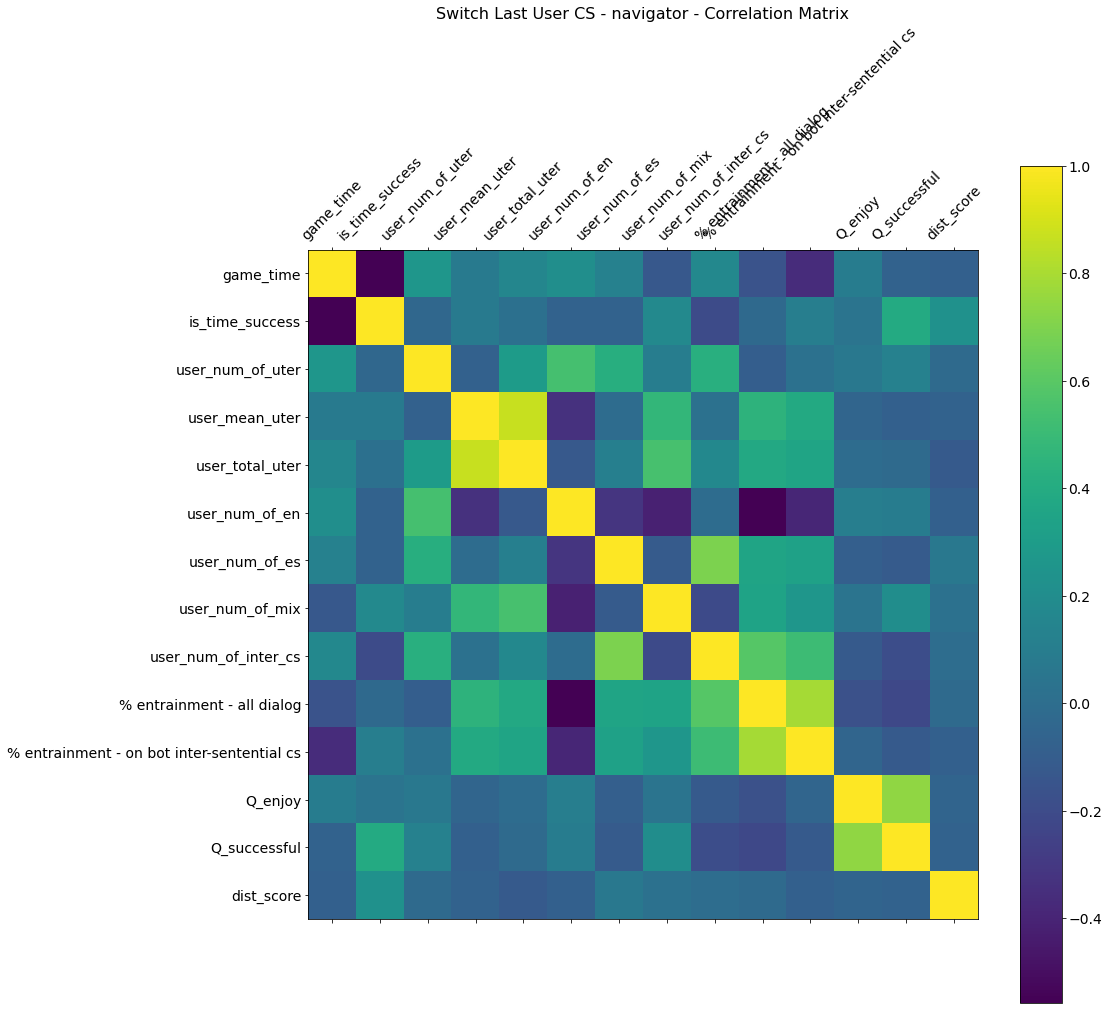

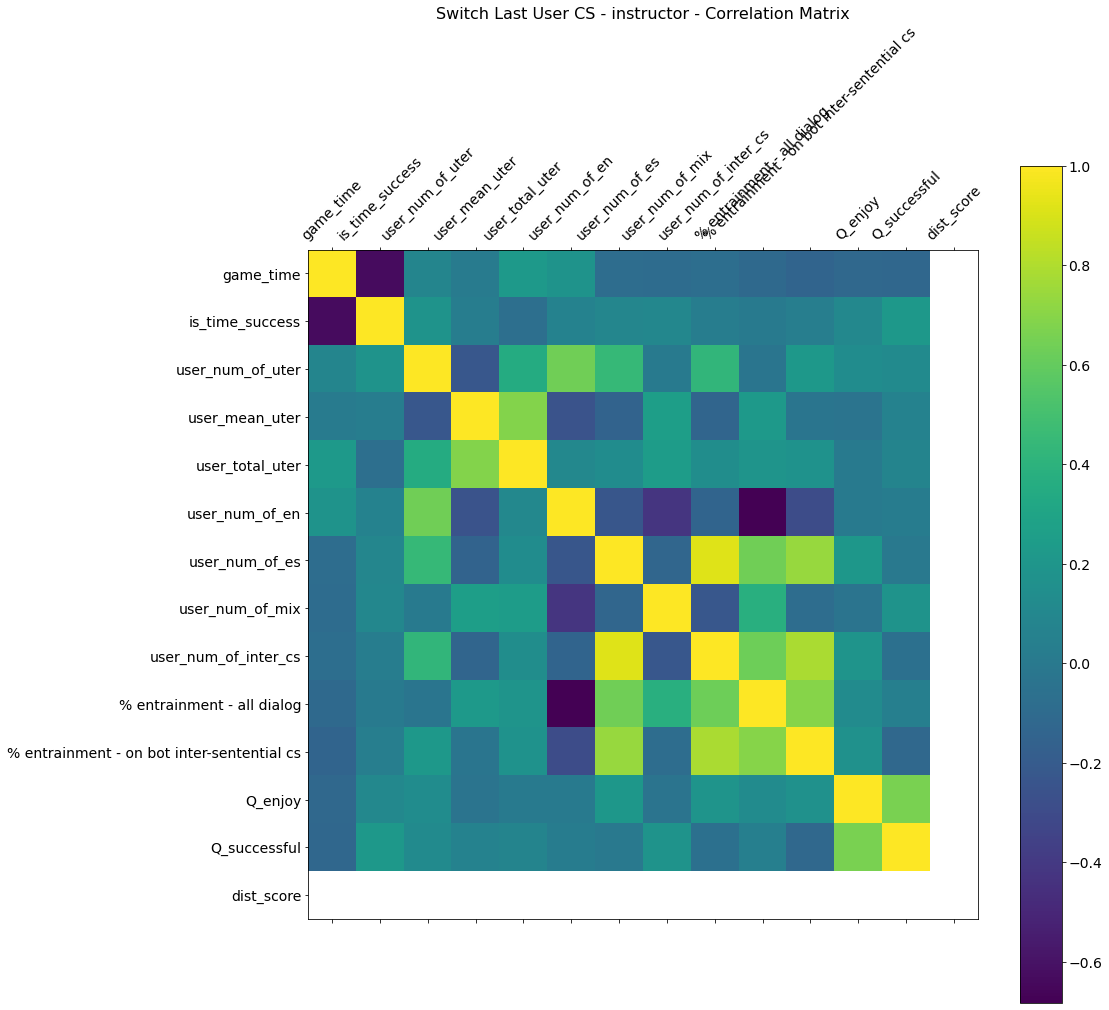

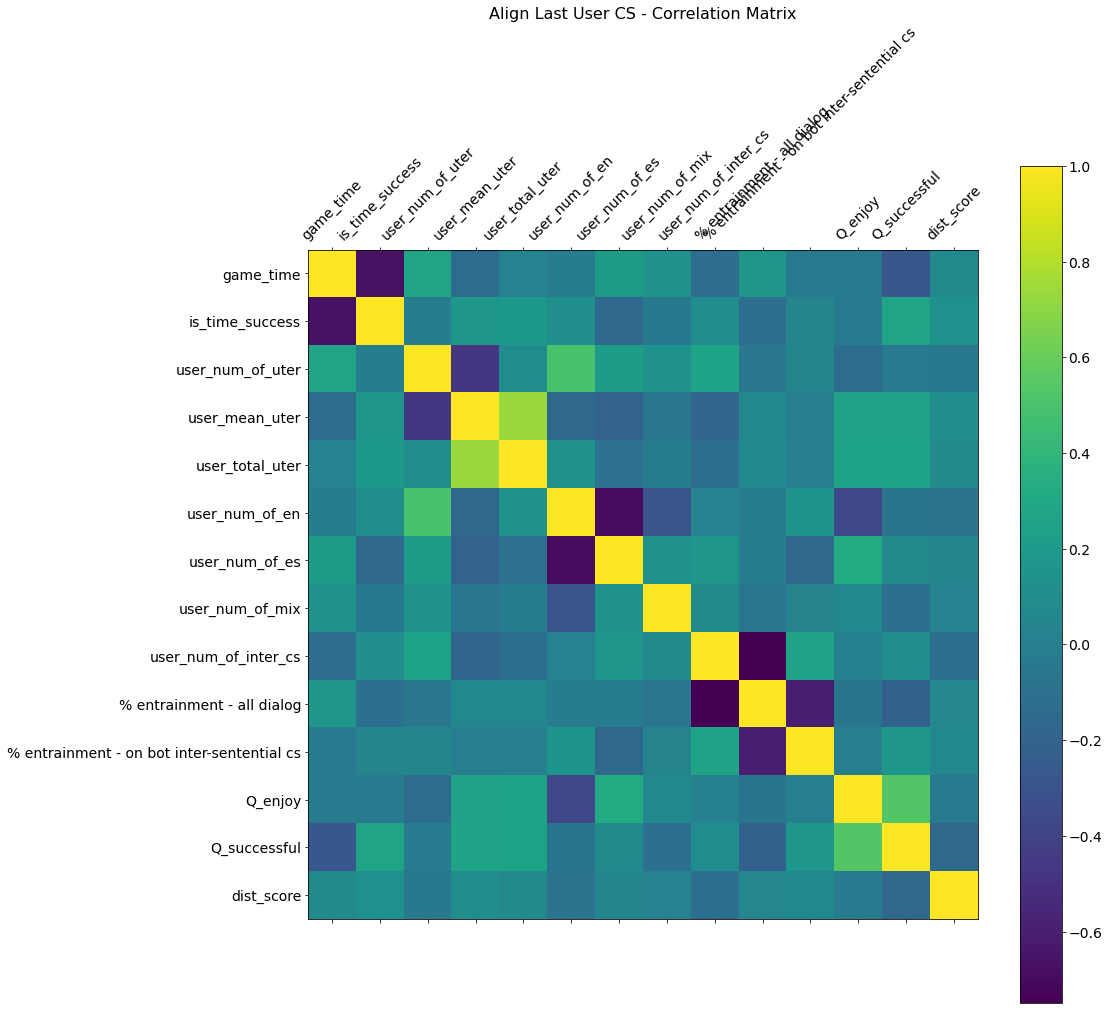

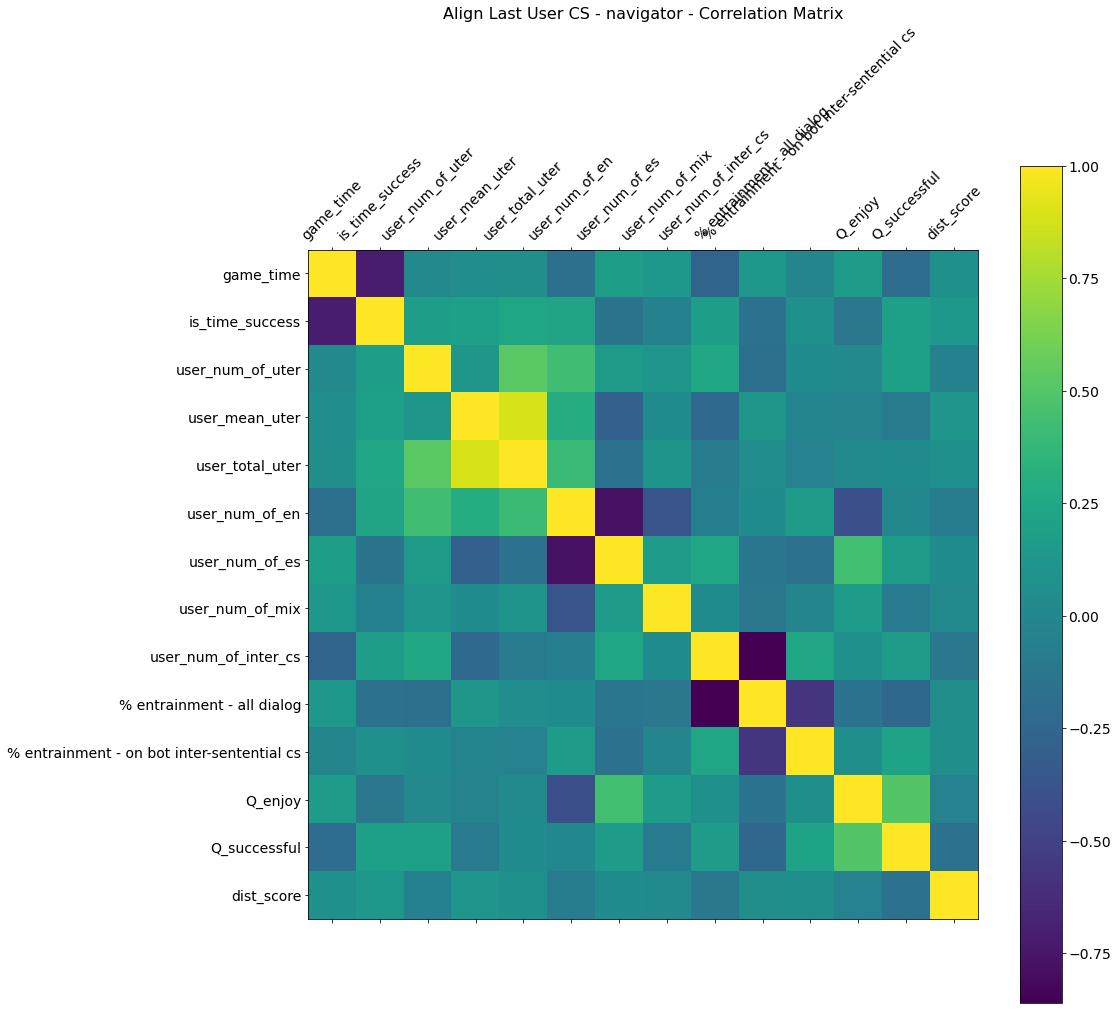

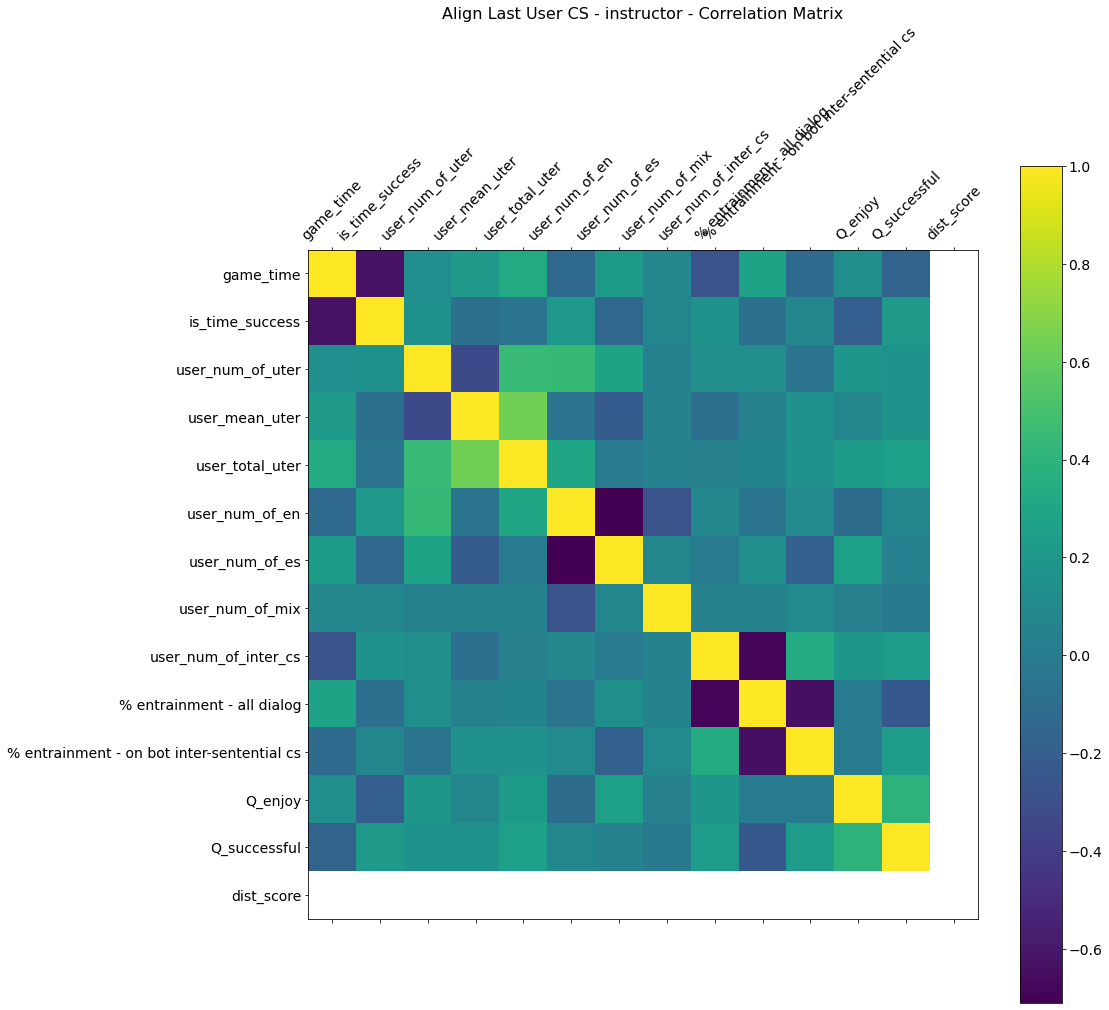

In [4]:
experiments = ['Baseline', 'Random CS', 'Short-context CS', 'Switch Last User CS', 'Align Last User CS']
for exp in experiments:
    exp_df = get_experiment_df([exp])
    exp_df = remove_rename_columns(exp_df)
    plot_corr_matt(exp_df, exp)
    
    for role in ['navigator', 'instructor']:
        exp_df = get_experiment_df([exp], role)
        exp_df = remove_rename_columns(exp_df)
        plot_corr_matt(exp_df, f'{exp} - {role}')
        
        if role == 'navigator':
            plot_2d_scatter(df=exp_df,
            x="% entrainment - all dialog",
            y="dist_score",
            color='is_time_success',
            size='game_time',
            title=f'{exp} - {role}')
        
        
        plot_2d_scatter(df=exp_df,
        x="% entrainment - all dialog",
        y="Q_enjoy",
        color='is_time_success',
        size='game_time',
        title=f'{exp} - {role}')

In [5]:
# exp_df.hist()


In [6]:
df_copy = get_experiment_df(experiments)
df_copy = remove_rename_columns(df_copy, False)

# plot_corr_matt(df_copy, 'all')
plot_2d_scatter(df=df_copy,
        x="user_num_of_es",
        y="user_num_of_inter_cs",
        color='experiment',
        size='game_time',
        title=f'all')

plot_2d_scatter(df=df_copy,
        x="user_num_of_es",
        y="Q_enjoy",
        color='experiment',
        size='game_time',
        title=f'all')

for role in ['navigator', 'instructor']:
    exp_df = get_experiment_df(experiments, role)
    exp_df = remove_rename_columns(exp_df, False)
#     plot_corr_matt(exp_df, f'all - {role}')

    if role == 'navigator':
        plot_2d_scatter(df=exp_df,
        x="% entrainment - all dialog",
        y="dist_score",
        color='experiment',
        size='game_time',
        title=f'all - {role}')


    plot_2d_scatter(df=exp_df,
    x="% entrainment - all dialog",
    y="Q_enjoy",
    color='experiment',
    size='game_time',
    title=f'all - {role}')

In [7]:
px.bar(df_copy, x='experiment', y='user_num_of_mix', color='human_role', barmode='group').show()
px.bar(df_copy, x='experiment', y='user_num_of_inter_cs', color='human_role', barmode='group').show()
px.bar(df_copy, x='experiment', y='user_num_of_es', color='human_role', barmode='group').show()
px.bar(df_copy, x='experiment', y='Q_enjoy', color='human_role', barmode='group').show()
